In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.shape

(200, 5)

In [6]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Newspaper', ylabel='Density'>

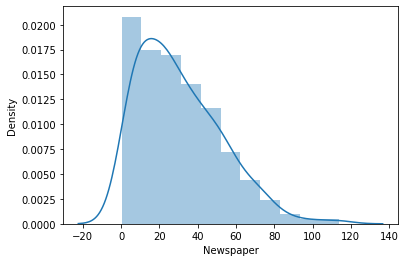

In [11]:
sns.distplot(df['Newspaper'])

In [12]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [13]:
lower_bridge = df['Newspaper'].quantile(0.25) - (iqr*1.5)
upper_bridge = df['Newspaper'].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [14]:
data = df.copy()

In [15]:
data.loc[data['Newspaper']>=93, 'Newspaper']=93

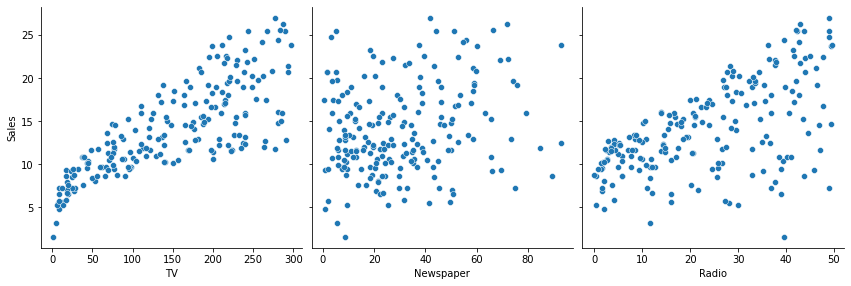

In [16]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'],
            y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

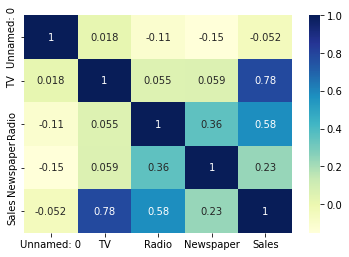

In [17]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [18]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [19]:
print(important_features)

['TV', 'Radio', 'Sales']


In [20]:
x = data['TV']
y = data['Sales']

In [21]:
x = x.values.reshape(-1,1)

In [22]:
print(x.shape,y.shape)

(200, 1) (200,)


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.33)

In [24]:
print(x_train.shape,y_train.shape)

(134, 1) (134,)


In [25]:
from sklearn.metrics import  mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [26]:
knn = KNeighborsRegressor().fit(x_train, y_train)
knn

KNeighborsRegressor()

In [27]:
knn_train_pred = knn.predict(x_train)

In [28]:
knn_test_pred = knn.predict(x_test)

In [29]:
print(knn_train_pred, knn_test_pred)

[19.44 14.18 16.4  16.74 14.26 17.7  18.28  7.36 21.62 17.74 12.72  7.72
 14.18 20.96 12.66 15.14 16.34 11.92 10.56  7.5  12.06 14.98 16.64  5.96
  7.5   7.72 17.1   5.96 11.52  8.98 16.04 16.86 19.9   8.2  15.62 12.66
 14.24 13.66 11.92 19.4  16.12  8.2  18.96  5.96  9.82 15.9  19.68 21.62
 16.18 11.82 19.64 12.92 19.74 11.44 10.08 19.74 11.52 16.18 15.18 16.52
 16.3  15.14 10.7  19.4   4.52  9.66 12.92 10.96 11.92 15.48 15.18 14.18
 20.86  4.52 18.28 18.96 13.66 10.96 11.06 19.4  11.44 12.92 17.1  14.24
 13.28 16.18 14.32  8.26 16.86 11.44 21.62  8.2  14.18 20.86 18.96 11.9
 12.6  16.34  7.72 12.66 18.96 19.64 19.74 20.36 13.5  16.4  11.52 14.26
 10.6  11.92  8.26 13.28 17.1  17.56 10.02 10.6  16.12 19.9  12.72  9.66
  9.66  5.96 11.92 14.96 16.74  7.72 10.56 18.54 11.52 13.4  15.78  6.12
  5.96 17.1 ] [15.48 15.64 14.96  9.6  11.44 12.92 21.62 11.52 11.92 11.52 11.54 10.96
 11.92 12.66 14.96  7.36 17.9  18.14 14.24 21.62  7.5  15.86 12.66 14.18
 19.4  12.72 21.62 18.28 10.02 15.86  

In [30]:
Results = pd.DataFrame(columns=['Model','Train R2','Test R2', 'Test RMSE','Variance'])

In [31]:
r2 = r2_score(y_test, knn_test_pred)
r2_train = r2_score(y_train, knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test, knn_test_pred))
variance = r2_train - r2
Results = Results.append({'Model':'K-Nearest Neighbors','Train R2':r2_train, 'Test R2':r2, 'Test RMSE': rmse,'Variance':variance},ignore_index=True)
print('R2:',r2)
print('RMSE:',rmse)

R2: 0.49573128843944436
RMSE: 3.846921634320884


In [32]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.686244,0.495731,3.846922,0.190513


In [33]:
import statsmodels.api as sm

In [34]:
x_train_constant = sm.add_constant(x_train)

In [35]:
model = sm.OLS(y_train, x_train_constant).fit()

In [36]:
model.params

const    7.063848
x1       0.045943
dtype: float64

In [37]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     196.6
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           6.49e-28
Time:                        17:36:19   Log-Likelihood:                -346.81
No. Observations:                 134   AIC:                             697.6
Df Residuals:                     132   BIC:                             703.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0638      0.555     12.723      0.0

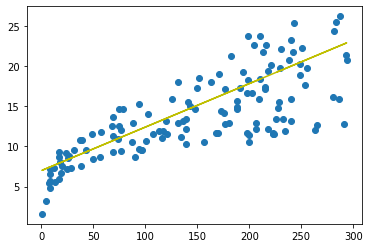

In [38]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.9955 + 0.0541 * x_train, 'y')
plt.show()

In [39]:
y_train_pred = model.predict(x_train_constant)
res = (y_train - y_train_pred)
res

58     7.051287
160   -0.589082
167   -4.364940
103   -0.996610
41     1.904173
         ...   
110   -4.037864
180   -3.758582
158   -0.301386
5     -0.263556
48    -2.702185
Name: Sales, Length: 134, dtype: float64

In [40]:
y_train_pred

array([16.74871307, 14.98908156, 16.56493955, 15.69660964, 15.19582678,
       15.96308125, 17.06572241,  7.67030089, 19.99231581, 17.00599601,
       12.58624271,  7.85407441, 14.88341178, 20.20365536, 10.65662069,
       16.21117551, 15.84362846, 10.43609246, 11.39171479,  7.92298949,
       13.32133681, 17.19436387, 16.69358102,  7.45896133,  7.96433853,
        7.88623478, 17.63542034,  7.44977266, 10.24313025,  8.51106477,
       16.48224146, 19.24803303, 18.16836356,  8.29513088, 15.37041163,
       10.56932826, 13.1145916 , 17.2816563 , 12.39328051, 20.41958926,
       16.24333588,  8.21702713, 18.08566548,  7.42220663,  9.28291358,
       16.36738301, 16.8727602 , 20.09339125, 16.14226044, 11.99816743,
       16.92789226, 13.45916696, 18.79778789, 11.12064884,  9.03941366,
       18.72427848, 10.20637555, 16.14226044, 14.02427055, 17.7273071 ,
       15.45310972, 16.20198683, 11.67656376, 20.55282506,  7.09600862,
        8.81888543, 13.47294997, 11.46062986, 10.5141962 , 15.13

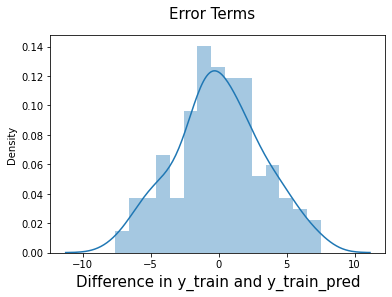

In [41]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize = 15)
plt.show()

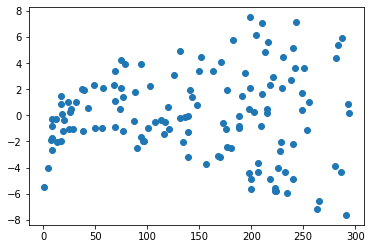

In [42]:
plt.scatter(x_train, res)
plt.show()

In [43]:
x_test_constant = sm.add_constant(x_test)
y_pred = model.predict(x_test_constant)

In [44]:
y_pred

array([15.10853435, 19.32613678, 14.67207223,  9.10832873, 11.18496957,
       13.39944056, 20.12555161, 10.10070577, 10.53257356, 10.30745099,
       11.86952596, 11.48360155, 10.52338488, 10.74850745, 14.72720429,
        7.66570655, 16.041185  , 19.63855177, 13.00892182, 19.78557059,
        7.95514985, 15.55877949, 10.5739226 , 14.62153451, 20.68146653,
       12.60002572, 19.93718375, 17.09788277,  9.52181916, 15.55877949,
        8.80969675,  7.31194251, 16.44089242, 14.56640245, 19.26641038,
       11.00119605, 17.97080702, 13.27539343,  9.92612092, 17.53893924,
       12.14978059,  8.23999882, 11.54332795, 19.77638192, 13.50970468,
       16.86816587, 17.97080702, 10.13746048,  9.11751741,  9.80207379,
       17.16220351, 13.9461668 , 19.06885384, 12.10843154, 18.08107114,
       17.02437336, 12.71947852, 15.94010956, 20.37364587, 12.10843154,
       17.1851752 , 18.05809945,  9.044008  ,  8.32729124,  7.92758383,
       19.13317457])

In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [46]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.3156923667606035

In [47]:
r2 = r2_score(y_test, y_pred)
r2

0.6253861736077537

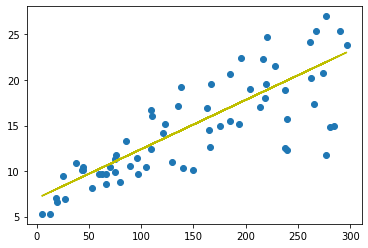

In [48]:
plt.scatter(x_test, y_test)
plt.plot(x_test, 6.9955 + 0.0541 * x_test, 'y')
plt.show()